# Data analysis Mental health data
Day 2 : 02/25/2019
reference: https://www.kaggle.com/jchen2186/data-visualization-with-python-seaborn/data

In [1]:
import numpy as np
import pandas as pd
import random as rnd

import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#df=pd.read_csv('https://github.com/arindambarman/Data/blob/master/mental-heath-in-tech-2016_20161114.csv')
df=pd.read_csv('C:/Users/Arindam/Documents/Personal/Data Science/Data/mental-heath/mental-heath-in-tech-2016_20161114.csv')

df.head()


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [6]:
df.describe(include=['O'])

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If so, what condition(s) were you diagnosed with?","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
count,1146,1146,1013,1146,1146,1146,1146,1146,1146,1146,...,711,1433,1433,1430,1433,840,1433,851,1433,1433
unique,6,4,3,3,3,3,6,3,3,3,...,116,5,5,70,53,47,53,48,264,3
top,26-100,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,...,"Mood Disorder (Depression, Bipolar Disorder, etc)",Not applicable to me,Often,Male,United States of America,California,United States of America,California,Back-end Developer,Sometimes
freq,292,531,354,813,531,742,281,487,837,479,...,187,557,538,610,840,130,851,141,263,757


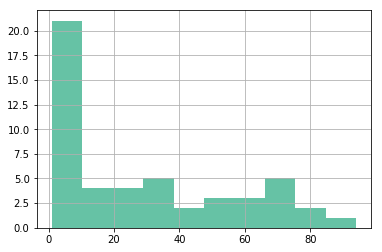

In [11]:
 # clean the ages by replacing the weird ages with the mean age
# clean the ages by replacing the weird ages with the mean age
df.loc[(df['What is your age?'] > 90), 'What is your age?'] = 34
df.loc[(df['What is your age?'] < 10), 'What is your age?'] = 34

# print('Age\tCount')
df['What is your age?'].value_counts().hist()

In [15]:
# replacing gender values with standard one
# clean the genders by grouping the genders into 3 categories: Female, Male, Genderqueer/Other
df['What is your gender?'] = df['What is your gender?'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
df['What is your gender?'] = df['What is your gender?'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
df['What is your gender?'] = df['What is your gender?'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Genderqueer/Other')


In [27]:
df['What is your gender?'].replace(np.NaN,'Male')
df['What is your gender?'].unique()


array(['Male', 'Female', 'Genderqueer/Other', nan], dtype=object)

In [29]:
df.drop(['Why or why not?', 'Why or why not?.1'], axis=1, inplace=True)

# Data visualization

In [34]:
#The most common mental health disorder appears to be mood disorder, followed by anxiety disorder.

disorders = {}
disorderCounts = dict(df['If so, what condition(s) were you diagnosed with?'].value_counts())
for i in disorderCounts:
    # get the disorders separately in case someone answered with more than one disorder
    disorderList = i.split('|')
    for j in disorderList:
        j = j.split(' (')[0]
        disorders[j] = disorders.get(j, 0) + disorderCounts[i]
tmp = pd.DataFrame()
for i in disorders:
    tmp = tmp.append([i] * disorders[i])
tmp.head()    

tmp[0] = tmp[0].replace([
    'Autism Spectrum Disorder', 'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
    'autism spectrum disorder', 'PDD-NOS'], 'Autism')
tmp[0] = tmp[0].replace(['Aspergers', 'Asperger Syndrome'], "Asperger's Syndrome")
tmp[0] = tmp[0].replace(['posttraumatic stress disourder'], 'Post-traumatic Stress Disorder')
tmp[0] = tmp[0].replace(['ADD', 'Attention Deficit Disorder', 'attention deficit disorder'],
                       'Attention Deficit Hyperactivity Disorder')
tmp[0] = tmp[0].replace(['Schizotypal Personality Disorder'], 'Personality Disorder')
tmp[0] = tmp[0].replace(['Depression'], 'Mood Disorder')
tmp[0] = tmp[0].replace([
    'Autism', "Asperger's Syndrome", 'Intimate Disorder',
    'Seasonal Affective Disorder', 'Burn out', 'Gender Identity Disorder',
    'Suicidal Ideation', 'Gender Dysphoria', 'MCD'], 'Others')

,0
0,Mood Disorder
1,Mood Disorder
2,Mood Disorder
3,Mood Disorder
4,Mood Disorder


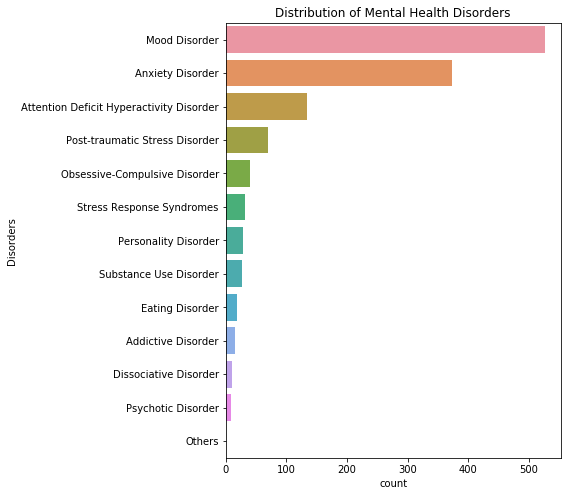

In [40]:
plt.figure(figsize=(6,6
                   ))
g = sns.countplot(y=tmp[0], order=[
    'Mood Disorder', 'Anxiety Disorder', 'Attention Deficit Hyperactivity Disorder',
    'Post-traumatic Stress Disorder', 'Obsessive-Compulsive Disorder',
    'Stress Response Syndromes', 'Personality Disorder', 'Substance Use Disorder',
    'Eating Disorder', 'Addictive Disorder', 'Dissociative Disorder', 
    'Psychotic Disorder', 'Others'])
g.set_ylabel('Disorders')
g.set_title('Distribution of Mental Health Disorders')
plt.show()

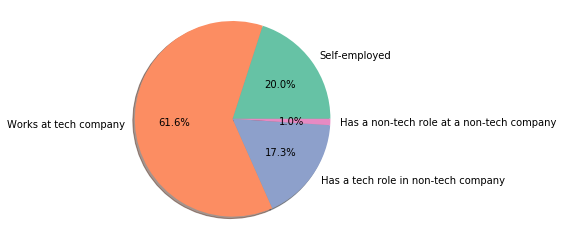

In [49]:
labels = ['Self-employed', 'Works at tech company', 'Has a tech role in non-tech company', 'Has a non-tech role at a non-tech company']

sizes = [df['Are you self-employed?'].value_counts()[1],
         df['Is your employer primarily a tech company/organization?'].value_counts()[1],
         df['Is your primary role within your company related to tech/IT?'].value_counts()[1],
         df['Is your primary role within your company related to tech/IT?'].value_counts()[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True)
ax1.axis('equal');

Distribution of Mental Health Status for All Ages and Genders

In [54]:
df.rename(columns={'What is your age?': 'Age',
                     'What is your gender?': 'Gender',
                     'Do you currently have a mental health disorder?': 'Has MHD'}, inplace=True)

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


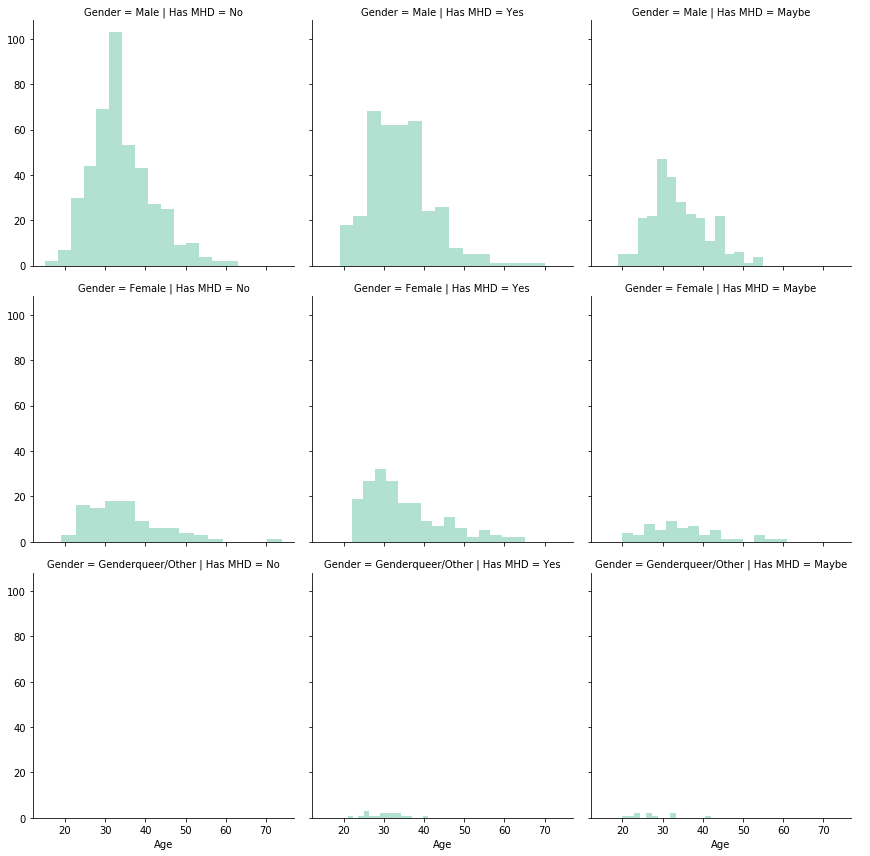

In [56]:
g = sns.FacetGrid(df, row='Gender', col='Has MHD', size=4)
g.map(plt.hist,'Age',alpha=0.5, bins=15)
g.add_legend()
plt.show()

Willingness to Bring Up Health Issues in an Interview: Physical vs. Mental

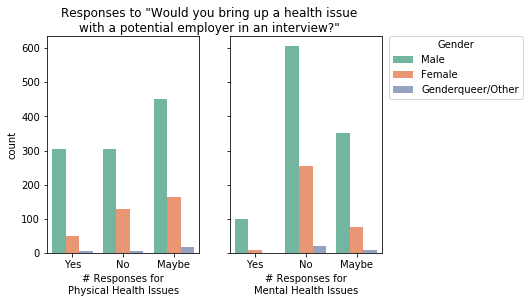

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.suptitle('Responses to "Would you bring up a health issue\nwith a potential employer in an interview?"')
g1 = sns.countplot(x='Would you be willing to bring up a physical health issue with a potential employer in an interview?',
                  hue='Gender', data=df, ax=ax1, order=['Yes', 'No', 'Maybe'])
g2 = sns.countplot(x='Would you bring up a mental health issue with a potential employer in an interview?',
                  hue='Gender', data=df, ax=ax2, order=['Yes', 'No', 'Maybe'])

g1.legend_.remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
g1.set_xlabel('# Responses for\nPhysical Health Issues')
g2.set_xlabel('# Responses for\nMental Health Issues')
g2.set_ylabel('')
plt.show()

Is Having Mental Health Issues is Harmful to One's Career?

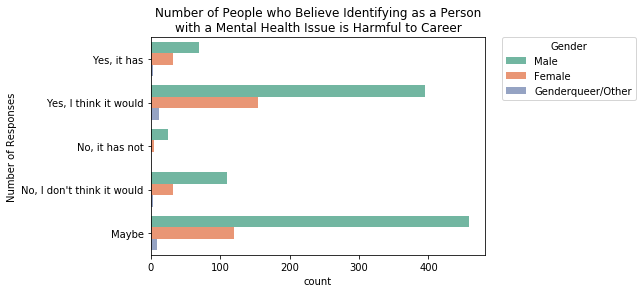

In [61]:
g = sns.countplot(y='Do you feel that being identified as a person with a mental health issue would hurt your career?',
                 hue='Gender', data=df, 
                  order=['Yes, it has', 'Yes, I think it would',
                        'No, it has not', "No, I don't think it would", 'Maybe'])
plt.title('Number of People who Believe Identifying as a Person\nwith a Mental Health Issue is Harmful to Career')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
plt.ylabel('Number of Responses')
plt.show()


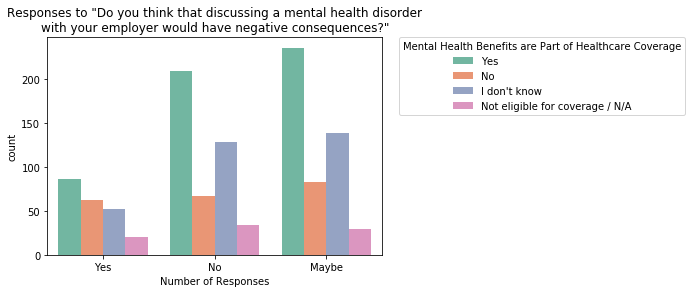

In [63]:
g = sns.countplot(x='Do you think that discussing a mental health disorder with your employer would have negative consequences?',
                 hue='Does your employer provide mental health benefits as part of healthcare coverage?',
                 data=df, 
                 order=['Yes', 'No', 'Maybe'],
                 hue_order=['Yes', 'No', "I don't know", 'Not eligible for coverage / N/A'])

plt.title('Responses to "Do you think that discussing a mental health disorder\nwith your employer would have negative consequences?"')
plt.xlabel('Number of Responses')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
         title='Mental Health Benefits are Part of Healthcare Coverage')
plt.show()